In [1]:
using SymPy


INFO: Precompiling module SymPy...
INFO: Recompiling stale cache file /home/kiran/.julia/lib/v0.4/PyCall.ji for module PyCall.
INFO: Installing sympy via the Conda sympy package...


Fetching package metadata .......
Solving package specifications: ..........

Package plan for installation in environment /home/kiran/.julia/v0.4/Conda/deps/usr:

The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    mpmath-0.19                |           py27_1         873 KB
    sympy-1.0                  |           py27_0         5.6 MB
    ------------------------------------------------------------
                                           Total:         6.5 MB

The following NEW packages will be INSTALLED:

    mpmath: 0.19-py27_1
    sympy:  1.0-py27_0 

Fetching packages ...
mpmath-0.19-py 100% |###############################| Time: 0:00:01 738.34 kB/s
sympy-1.0-py27 100% |###############################| Time: 0:00:02   2.38 MB/s
Extracting packages ...
[      COMPLETE      ]|##################################################| 100%
Linking packages ...
[      COMPLETE      ]|#####

In [60]:
@vars h0 alpha0 beta0 w t k C a phi psi c

(h0,alpha0,beta0,w,t,k,C,a,phi,psi,c)

In [3]:
u, rho, b = symbols("u, rho, b")


(u,rho,b)

In [49]:
h = -h0*exp(im*w*t) #Minus because plunge is downward in Theo


     I*t*w
-h0*e     

In [50]:
P_h = -rho*b*b*pi*diff(h,t,2)-2*rho*u*pi*b*C*diff(h,t,1)


                       I*t*w       2         2  I*t*w
2*I*pi*C*b*h0*rho*u*w*e      - pi*b *h0*rho*w *e     

In [54]:
Cl_h = simplify(-2*P_h/(rho*u*u))  #Minus because lift is downward in Theo

                              I*t*w
2*pi*b*h0*w*(-2*I*C*u + b*w)*e     
-----------------------------------
                  2                
                 u                 

In [55]:
Cl_h = simplify(subs(Cl_h,b*w,u*k))

                        I*t*w
2*pi*h0*k*(-2*I*C + k)*e     

In [20]:
#Brilliant

In [74]:
alpha = alpha0*exp(im*(w*t+phi))
P_alpha = -rho*b*b*(u*pi*diff(alpha,t,1)-pi*b*a*diff(alpha,t,2)) - 2*rho*u*b*C*pi*(u*alpha+b*(1/2-a)*diff(alpha,t,1))


                 /                         I*(phi + t*w)             I*(phi + 
- 2*pi*C*b*rho*u*\I*alpha0*b*w*(-a + 0.5)*e              + alpha0*u*e         

t*w)\    2     /               2  I*(phi + t*w)                    I*(phi + t*
    / - b *rho*\pi*a*alpha0*b*w *e              + I*pi*alpha0*u*w*e           

w)\
  /

In [57]:
Cl_alpha = simplify(-P_alpha/(rho*u*u*b)) #Minus because lift is downward in Theo

                                                              I*(phi + t*w)
pi*alpha0*(-2*C*u*(I*b*w*(a - 0.5) - u) + b*w*(a*b*w + I*u))*e             
---------------------------------------------------------------------------
                                      2                                    
                                     u                                     

In [58]:
Cl_alpha = simplify(subs(Cl_alpha,b*w,u*k)) 

                                                    I*(phi + t*w)
-pi*alpha0*(2*C*(I*k*(a - 0.5) - 1) - k*(a*k + I))*e             

In [59]:
beta = beta0*exp(im*(w*t+psi))

       I*(psi + t*w)
beta0*e             

In [63]:
T1 = -(2+c*c)*sqrt(1-c*c)/3+c*acos(c)

                          __________
            /   2    \   /    2     
            \- c  - 2/*\/  - c  + 1 
c*acos(c) + ------------------------
                       3            

In [64]:
T4 = c*sqrt(1-c*c)-acos(c)

     __________          
    /    2               
c*\/  - c  + 1  - acos(c)

In [65]:
T11 = (2-c)*sqrt(1-c*c)+(1-2*c)*acos(c)


                                 __________
                                /    2     
(-2*c + 1)*acos(c) + (-c + 2)*\/  - c  + 1 

In [84]:
T10 = sqrt(1-c*c)+acos(c)
P_beta = -rho*b*b*(-u*T4*diff(beta,t,1) - T1*b*diff(beta,t,2)) - 2*rho*u*b*C*pi*(T10*u*beta/pi + (b*T11*diff(beta,t,1)/2)/pi)


                 /            /                                 __________\   
                 |            |                                /    2     |  I
                 |I*b*beta0*w*\(-2*c + 1)*acos(c) + (-c + 2)*\/  - c  + 1 /*e 
- 2*pi*C*b*rho*u*|------------------------------------------------------------
                 \                                  2*pi                      

                       /   __________          \               \          /   
*(psi + t*w)           |  /    2               |  I*(psi + t*w)|          |   
               beta0*u*\\/  - c  + 1  + acos(c)/*e             |    2     |   
------------ + ------------------------------------------------| - b *rho*|b*b
                                      pi                       /          \   

        /                          __________\                                
        |            /   2    \   /    2     |                              / 
      2 |            \- c  - 2/*\/  - c  + 1 |  I*

In [85]:
Cl_beta = simplify(-P_beta/(rho*u*u*b)) #Minus because lift is downward in Theo

      /      /        /           __________                    \       /   __
      |      |        |          /    2                         |       |  /  
beta0*\3*C*u*\- I*b*w*\(c - 2)*\/  - c  + 1  + (2*c - 1)*acos(c)/ + 2*u*\\/  -
------------------------------------------------------------------------------
                                                                              
                                                                              

________          \\       /    /                 __________         \        
  2               ||       |    |                /    2      / 2    \|        
 c  + 1  + acos(c)// + b*w*\b*w*\3*c*acos(c) - \/  - c  + 1 *\c  + 2// - 3*I*u
------------------------------------------------------------------------------
                        2                                                     
                     3*u                                                      

 /     __________          \\\               
 |  

In [86]:
Cl_beta = simplify(subs(Cl_beta,b*w,u*k)) 

      /    /      /           __________                    \        _________
      |    |      |          /    2                         |       /    2    
beta0*\3*C*\- I*k*\(c - 2)*\/  - c  + 1  + (2*c - 1)*acos(c)/ + 2*\/  - c  + 1
------------------------------------------------------------------------------
                                                                              

_            \     /  /                 __________         \       /     _____
             |     |  |                /    2      / 2    \|       |    /    2
  + 2*acos(c)/ + k*\k*\3*c*acos(c) - \/  - c  + 1 *\c  + 2// - 3*I*\c*\/  - c 
------------------------------------------------------------------------------
                3                                                             

_____          \\\               
               |||  I*(psi + t*w)
 + 1  - acos(c)///*e             
---------------------------------
                                 

In [77]:
#Lets also express it in terms of the Ts

In [78]:
@vars t1 t4 t10 t11

(t1,t4,t10,t11)

In [79]:
P_beta = -rho*b*b*(-u*t4*diff(beta,t,1) - t1*b*diff(beta,t,2)) - 2*rho*u*b*C*pi*(t10*u*beta/pi + (b*t11*diff(beta,t,1)/2)/pi)


                 /                 I*(psi + t*w)                I*(psi + t*w)\
                 |I*b*beta0*t11*w*e                beta0*t10*u*e             |
- 2*pi*C*b*rho*u*|------------------------------ + --------------------------|
                 \             2*pi                            pi            /

                                                                        
    2     /            2  I*(psi + t*w)                   I*(psi + t*w)\
 - b *rho*\b*beta0*t1*w *e              - I*beta0*t4*u*w*e             /
                                                                        

In [80]:
Cl_beta = simplify(-P_beta/(rho*u*u*b)) #Minus because lift is downward in Theo

                                                           I*(psi + t*w)
beta0*(C*u*(I*b*t11*w + 2*t10*u) + b*w*(b*t1*w - I*t4*u))*e             
------------------------------------------------------------------------
                                    2                                   
                                   u                                    

In [81]:
Cl_beta = simplify(subs(Cl_beta,b*w,u*k)) 

                                               I*(psi + t*w)
beta0*(C*(I*k*t11 + 2*t10) + k*(k*t1 - I*t4))*e             

In [82]:
?lambdify


search: lambdify LambdaStaticData



`lambidfy(ex::Sym,[vars])`: Lambidfy an expression returning a native Julia function.  SymPy's [lambdify](http://docs.sympy.org/dev/modules/utilities/lambdify.html) function translates code into Python, this translates an expression into a `Julia` function.

Evaluating the function does not call into SymPy, so should be much faster.

The optional `[vars]` specifies the order of the variables when more than one is in `ex`. The default is to use the ordering of `free_symbols(ex)`.

The keyword aruguments allow for the passing of expressions that are not covered by the default ones. These are dictionaries whose keys are strings with a SymPy name and whose values are symbols representing `Julia` values. For examples `Dict("sin"=>:sin)` could be used to map a function, were that not already done.

Not all expressions can be lambdified. If not, an error is thrown.

Some simple examples

```
@vars x y
lambdify(x^2)(2)       # 4
lambdify(x*y^2)(2,3)   # 2*3^2 using default ordering
lambdify(x*y^2, [y, x])(2,3) # 3*2^2, as function is (y,x) -> x*y^2 equivalent in Julia
```

Compare times

```
xs = rand(1000)
@vars x
ex = sin(x)*cos(2x) * exp(x^2/2)
map(u -> N(ex(u)), xs)   # 3.435850 seconds
SymPy.mapsubs(ex, x, xs) # 0.008569 seconds (does calculuations in Python)
map(lambdify(ex), xs)    # 0.007085 seconds
```

This is a *temporary* solution. The proper fix is to do this in SymPy.


In [83]:
Cl_beta

                                               I*(psi + t*w)
beta0*(C*(I*k*t11 + 2*t10) + k*(k*t1 - I*t4))*e             

In [87]:
#I'll bring it back to the form without t*s

In [88]:
Cl_beta

      /    /      /           __________                    \        _________
      |    |      |          /    2                         |       /    2    
beta0*\3*C*\- I*k*\(c - 2)*\/  - c  + 1  + (2*c - 1)*acos(c)/ + 2*\/  - c  + 1
------------------------------------------------------------------------------
                                                                              

_            \     /  /                 __________         \       /     _____
             |     |  |                /    2      / 2    \|       |    /    2
  + 2*acos(c)/ + k*\k*\3*c*acos(c) - \/  - c  + 1 *\c  + 2// - 3*I*\c*\/  - c 
------------------------------------------------------------------------------
                3                                                             

_____          \\\               
               |||  I*(psi + t*w)
 + 1  - acos(c)///*e             
---------------------------------
                                 

In [89]:
#Try flap only case

In [104]:
step1 = Cl_beta(beta0=>5*pi/180, k=>3.93, c=>0.5, psi=>0,  w=>3.93*2, C=>besselh(1,2,3.93)./(besselh(1,2,3.93) + im*besselh(0,2,3.93))) 

-0.424797409752507

In [109]:
time = zeros(1000)
cl = zeros(1000)
for i = 1:1000
    time[i] = i*0.01
    cl[i] = real(subs(step1,t,time[i]))
end

In [106]:
using PyPlot


INFO: Recompiling stale cache file /home/kiran/.julia/lib/v0.4/LaTeXStrings.ji for module LaTeXStrings.
INFO: Recompiling stale cache file /home/kiran/.julia/lib/v0.4/PyPlot.ji for module PyPlot.
INFO: Recompiling stale cache file /home/kiran/.julia/lib/v0.4/Colors.ji for module Colors.
INFO: Recompiling stale cache file /home/kiran/.julia/lib/v0.4/FixedPointNumbers.ji for module FixedPointNumbers.
INFO: Recompiling stale cache file /home/kiran/.julia/lib/v0.4/ColorTypes.ji for module ColorTypes.


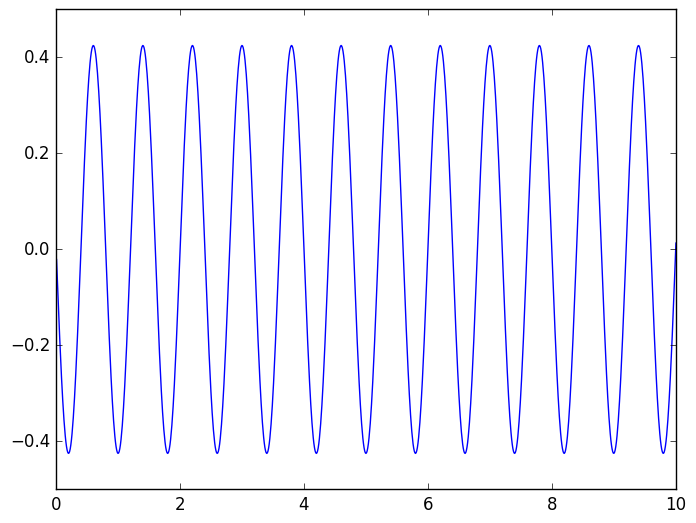

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fba52e86550>

In [113]:
plot(time,cl)